# Reading data from the Netcdf database using the netCDF4 module

So far, two  database types are supported by the current version of SHyFT:
- Statkraft internal database ("orchestration"); very limited access
- NETCDF database ("orchestration2")

Here we focus on the NETCDF database!


In [117]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [73]:
from netCDF4  import Dataset

In [118]:
# path to the dataset files
import os
data_path = os.path.abspath(os.path.realpath('../hycamp/project_shyft/atnsjoen_catchment/data/'))

####The database exists of three files:
- Cell data
- Discharge observatioons
- Meteorological observations

In [119]:
for filename in os.listdir(data_path):
    print(filename)

atnsjoen_cell_info.nc
atnsjoen_discharge.nc
atnsjoen_met.nc


##Meteorological observations

###Different stations are organized using NETCDF-groups
###Each group holds VARIABLES ...

In [148]:
fn_met = "atnsjoen_met.nc"
file_path = os.path.join(data_path,fn_met)

# opening the file and print the station names
with Dataset(file_path) as dset:
    for gr_key in dset.groups.keys():
        print(gr_key + ':')
        for var_key in dset.groups[gr_key].variables.keys():
            print('   -'+var_key)

ATNDALEN-ERIKSRUD:
   -time
   -precipitation
fake_relative_humidity:
   -time
   -relative_humidity
libru_nve:
   -time
   -temperature
fake_wind_speed:
   -time
   -wind_speed
WFDEI_station4:
   -time
   -radiation
atnsjoen_nve:
   -time
   -temperature
WFDEI_station1:
   -time
   -radiation
WFDEI_station2:
   -time
   -radiation
WFDEI_station3:
   -time
   -radiation
ATNSJOEN:
   -time
   -precipitation


Plotting a group-variabe:

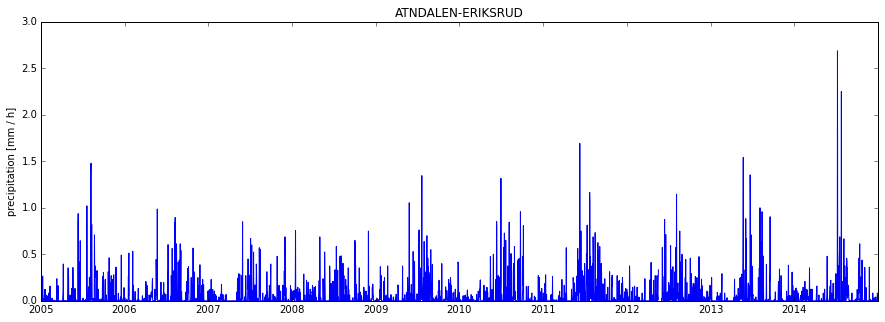

In [149]:
import datetime
with Dataset(file_path) as dset:    
    time = dset.groups["ATNDALEN-ERIKSRUD"].variables['time'][:]
    precip = dset.groups["ATNDALEN-ERIKSRUD"].variables['precipitation'][:]
    
dates = [datetime.datetime.utcfromtimestamp(t) for t in time]
figure(figsize=[15,5])
plot(dates, precip)
ylabel('precipitation [mm / h]') # input for accumulating variables PER HOUR!
title("ATNDALEN-ERIKSRUD")

####EXERCISE 1: Plot the time series of the "libru_nve"-station

In [150]:
with Dataset(file_path) as dset:
    pass
    #time = dset.groups.....
    #temperature = dset.groups....

###Additionally, every group holds ATTRIBUTES which inform about the station's location.

In [151]:
with Dataset(file_path) as dset:
    group = dset.groups["ATNDALEN-ERIKSRUD"]
    print("ATTRIBUTES:")
    print("  ","EPSG coordinate system:", group.EPSG)
    print("  ","station's x-coord:", group.x)
    print("  ","station's y-coord:", group.y)
    print("  ","station's elevation:", group.z, "in", group.z_unit)

ATTRIBUTES:
   EPSG coordinate system: 32633
   station's x-coord: 239463.796037
   station's y-coord: 6881084.41483
   station's elevation: 731.0 in masl


##Discharge observations
### used for calibration and evaluation of simulations

In [152]:
fn_met = "atnsjoen_discharge.nc"
file_path = os.path.join(data_path,fn_met)

# opening the file and print the station names
with Dataset(file_path) as dset:
    for gr_key in dset.groups.keys():
        print(gr_key + ':')
        for var_key in dset.groups[gr_key].variables.keys():
            print('   -'+var_key)

atnsjoen:
   -time
   -discharge


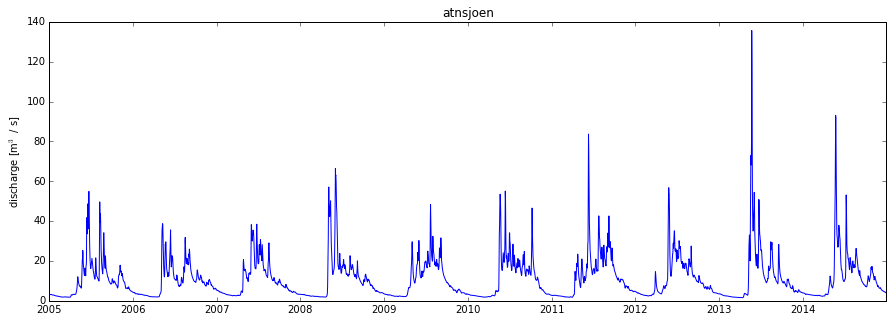

In [156]:
import datetime
with Dataset(file_path) as dset:    
    time = dset.groups["atnsjoen"].variables['time'][:]
    precip = dset.groups["atnsjoen"].variables['discharge'][:]
    
dates = [datetime.datetime.utcfromtimestamp(t) for t in time]
figure(figsize=[15,5])
plot(dates, precip)
ylabel('discharge [m$^3$ / s]')
title("atnsjoen")

##Static cell data
### used for calibration and evaluation of simulations

In [158]:
fn_met = "atnsjoen_cell_info.nc"
file_path = os.path.join(data_path,fn_met)

# opening the file and print the station names
with Dataset(file_path) as dset:
    for gr_key in dset.groups.keys():
        print(gr_key + ':')
        for var_key in dset.groups[gr_key].variables.keys():
            print('   -'+var_key)

elevation:
   -xcoord
   -ycoord
   -elevation
forest-fraction:
   -xcoord
   -ycoord
   -forest-fraction
lake-fraction:
   -xcoord
   -ycoord
   -lake-fraction
glacier-fraction:
   -xcoord
   -ycoord
   -glacier-fraction
catchments:
   -xcoord
   -ycoord
   -catchments
   -catchment_indices
   -catchment_names
reservoir-fraction:
   -xcoord
   -ycoord
   -reservoir-fraction


###Plotting the elevation the elevation

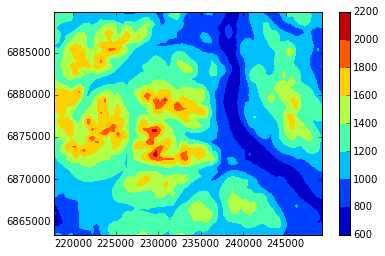

In [193]:
with Dataset(file_path) as dset:
    x_vector = dset.groups['elevation'].variables['xcoord'][:]
    y_vector = dset.groups['elevation'].variables['ycoord'][:]
    elevation = dset.groups['elevation'].variables['elevation'][:]
contourf(x_vector,y_vector,elevation)
colorbar()

###Plotting the elevation the catchment

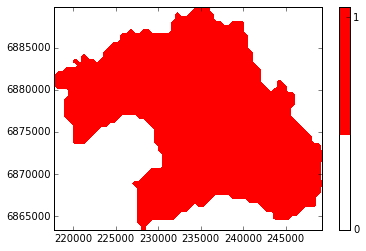

In [194]:
from matplotlib import colors
with Dataset(file_path) as dset:
    x_vector = dset.groups['catchments'].variables['xcoord'][:]
    y_vector = dset.groups['catchments'].variables['ycoord'][:]
    elevation = dset.groups['catchments'].variables['catchments'][:]

# make a color map of fixed colors
cmap = colors.ListedColormap(['white', 'red'])
bounds=[0.0,0.5,1.0]
norm = colors.BoundaryNorm(bounds, cmap.N)

# plot
fig = contourf(x_vector,y_vector,elevation,cmap=cmap, norm=norm)

# make a color bar
colorbar(fig, cmap=cmap, norm=norm, boundaries=bounds, ticks=[0., 1.0])

####EXERCISE 2:
* Calculate the size of the cells (x and y)
* Use the variables "catchment_indices" and "catchment_names" of the group "catchments" to find out about the mapping between the discharge timeseries and the associated catchment area.